# 5. NonLinear Regression

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 5.1 Generating Data

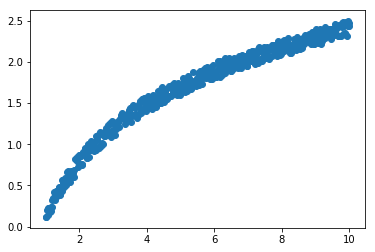

In [3]:
x = torch.linspace(1, 10, 500)
y = x.log() + 0.2*torch.rand(x.size())
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

## 5.2 Define NonLinear Model

In [4]:
model = nn.Linear(1, 1, bias=True)

In [5]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [6]:
x.shape, y.shape

(torch.Size([500]), torch.Size([500]))

In [7]:
x = torch.unsqueeze(x, dim=1)
y = torch.unsqueeze(y, dim=1)

In [8]:
x.shape, y.shape

(torch.Size([500, 1]), torch.Size([500, 1]))

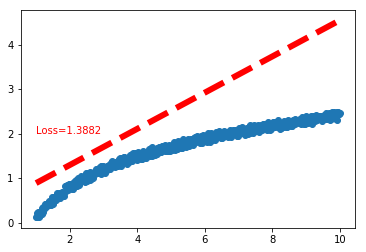

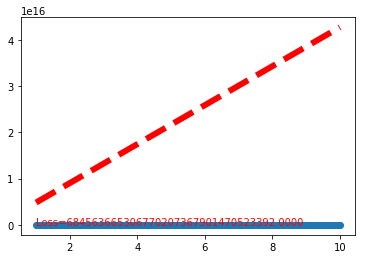

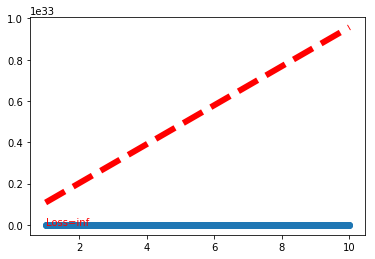

In [9]:
for t in range(60):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if t % 20 == 0:
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pre.data.numpy(), 'r--', lw=6)
        plt.text(1, 2, 'Loss=%.4f' % cost.data[0], fontdict={'size':10, 'color':'red'})
        plt.show()

## 5.3 Data Transformation with Log-scale

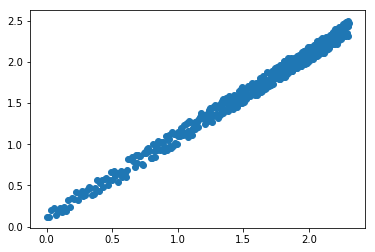

In [10]:
x = x.log()
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

## 5.4 Re-Define NonLinear Model 

In [11]:
model = nn.Linear(1, 1, bias=True)

In [12]:
loss = torch.nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

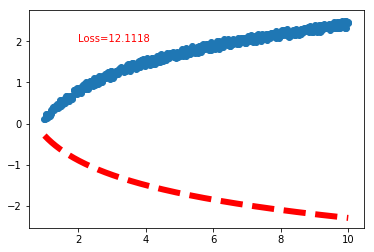

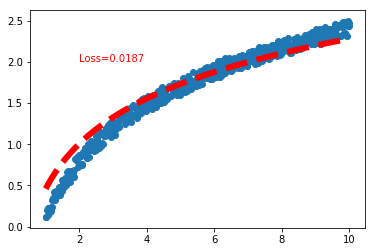

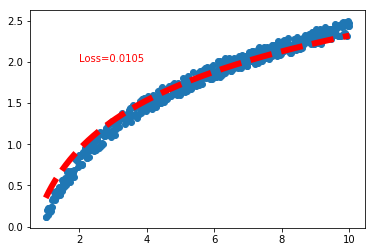

In [13]:
for t in range(60):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if t % 20  == 0:
        plt.scatter(x.exp().data.numpy(), y.data.numpy())
        plt.plot(x.exp().data.numpy(), pre.data.numpy(), 'r--', lw=6)
        plt.text(2, 2, 'Loss=%.4f' % cost.data[0], fontdict={'size':10, 'color':'red'})
        plt.show()